In [1]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
import pandas as pd
from scipy.stats import t
from sklearn.metrics import mean_squared_error

In [5]:
def train(x_train,y_train,spoches):
    index_spoches = np.zeros(len(x_train)-len(x_train)%spoches)
    index_list = list(range(0,len(x_train)))
    for i in range(len(x_train)-len(x_train)%spoches):
        index = np.random.choice(index_list)
        index_spoches[i] = index
        index_list.remove(index)
    index_spoches = index_spoches.reshape(spoches,int((len(x_train)-(len(x_train)%spoches))/spoches)).astype(int)
    return index_spoches,index_list

# def train(x_train,y_train,spoches):


def rate(x1,x2):
    a = abs(x1-x2)
    a1 = len(x1[np.where(a>0.5)])
    a2 = len(x1[np.where(a>1)])
    a3 = len(x1[np.where(a>1.5)])
    a4 = len(x1[np.where(a>2)])
    a5 = len(x1[np.where(a>2.5)])
    return a1,a2,a3,a4,a5

def cbrt(a):#python 不可以给负数开根，用此函数可以
    b = np.zeros(a.shape)
    for i in range(len(a)):
        s = -1 if a[i] < 0 else 1
        b[i]=s * (a[i]*s) ** (1/3)
    return b

In [6]:
befor = []
after = []
bt_05 = []
bt_1 = []
bt_15 = []
bt_20 = []
bt_25 = []
ft_05 = []
ft_1 = []
ft_15 = []
ft_20 = []
ft_25 = []
for spoches in range(1,201):
    mse = 0
    _mse = 0
    num = 20
    _a1,_a2,_a3,_a4,_a5,_b1,_b2,_b3,_b4,_b5=0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
    for _ in range(num):
        n = 200
        x = np.linspace(-2.5,2.5,n)
        y = x**3
        x1 = x+np.random.randn(n)
        a1,a2,a3,a4,a5 = rate(x1,x)
        _a1 += a1/n
        _a2 += a2/n
        _a3 += a3/n
        _a4 += a4/n
        _a5 += a5/n
        mse += np.sum((x1-x)**2)/n
        # _mse += mean_squared_error(x1,x)
        index,index_list = train(x1,y,spoches)
        x_point=[]
        y_point=[]
        for k in range(spoches):
            if len(index_list) == 0:
                x_set = x1[index[k]]
                y_set = y[index[k]]
            else:
                x_set = x1[np.hstack((index[k],index_list[0]))]
                y_set = y[np.hstack((index[k],index_list[0]))]
                index_list.pop(0)
            sort_index = np.argsort(x_set)
            for i in range(len(x_set)):
                if i == len(x_set)-1:
                    continue
                cha = 100*(x_set[sort_index[i+1]]-x_set[sort_index[i]])
                x_point.append(np.linspace(x_set[sort_index[i]],x_set[sort_index[i+1]],int(cha)))
                y_point.append(np.linspace(y_set[sort_index[i]],y_set[sort_index[i+1]],int(cha)))
        for i in x_point:
            x1 = np.hstack((x1,i))
        for i in y_point:
            y = np.hstack((y,i))
        _mse += np.sum((cbrt(y)-x1)**2)/x1.shape
        # _mse += mean_squared_error(cbrt(y),x1)
        b1,b2,b3,b4,b5 = rate(cbrt(y),x1)
        _b1 += b1/len(x1)
        _b2 += b2/len(x1)
        _b3 += b3/len(x1)
        _b4 += b4/len(x1)
        _b5 += b5/len(x1)
    # print(f"处理前误差:{mse/num}\n处理后误差:{_mse/num}\n大于0.5比例{_a1/num},{_b1/num}\n大于1比例{_a2/num},{_b2/num}\n大于1.5比例{_a3/num},{_b3/num}\n大于2比例{_a4/num},{_b4/num}\n大于2.5比例{_a5/num},{_b5/num}")
    befor.append(mse/num)
    after.append((_mse/num))
    bt_05.append(_a1/num)
    bt_1.append(_a2/num)
    bt_15.append(_a3/num)
    bt_20.append(_a4/num)
    bt_25.append(_a5/num)
    ft_05.append(_b1/num)
    ft_1.append(_b2/num)
    ft_15.append(_b3/num)
    ft_20.append(_b4/num)
    ft_25.append(_b5/num)

KeyboardInterrupt: 

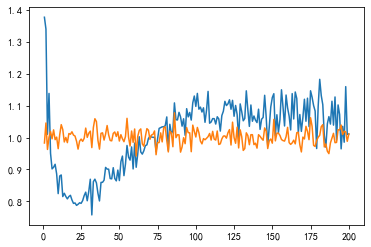

In [8]:
index = list(range(1,201))

plt.plot(index,after)
plt.plot(index,befor)
plt.show()

In [89]:

dic = {"K":index,"befor":befor,"after":after,"bt_05":bt_05,"bt_1":bt_1,"bt_15":bt_15,"bt_20":bt_20,"bt_25":bt_25,"ft_05":ft_05,"ft_1":ft_1,"ft_15":ft_15,"ft_20":ft_20,"ft_25":ft_25}
data = pd.DataFrame(dic)
data.to_csv(r"C:\Users\duduu\Desktop\DYK\data\模拟不同eta.csv")
print(np.argmin(after))

173


In [87]:
befor = []
after = []
bt_05 = []
bt_1 = []
bt_15 = []
bt_20 = []
bt_25 = []
ft_05 = []
ft_1 = []
ft_15 = []
ft_20 = []
ft_25 = []
for eta in range(1,201):
    spoches =21
    mse = 0
    _mse = 0
    num = 100
    _a1,_a2,_a3,_a4,_a5,_b1,_b2,_b3,_b4,_b5=0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
    for _ in range(num):
        n = 200
        x = np.linspace(-2.5,2.5,n)
        y = x**3
        x1 = x+np.random.normal(0,1,n)
        a1,a2,a3,a4,a5 = rate(x1,x)
        _a1 += a1/n
        _a2 += a2/n
        _a3 += a3/n
        _a4 += a4/n
        _a5 += a5/n
        mse += np.sum((x1-x)**2)/n
        # _mse += mean_squared_error(x1,x)
        index,index_list = train(x1,y,spoches)
        x_point=[]
        y_point=[]
        for k in range(spoches):
            if len(index_list) == 0:
                x_set = x1[index[k]]
                y_set = y[index[k]]
            else:
                x_set = x1[np.hstack((index[k],index_list[0]))]
                y_set = y[np.hstack((index[k],index_list[0]))]
                index_list.pop(0)
            sort_index = np.argsort(x_set)
            for i in range(len(x_set)):
                if i == len(x_set)-1:
                    continue
                cha = eta*(x_set[sort_index[i+1]]-x_set[sort_index[i]])
                x_point.append(np.linspace(x_set[sort_index[i]],x_set[sort_index[i+1]],int(cha)))
                y_point.append(np.linspace(y_set[sort_index[i]],y_set[sort_index[i+1]],int(cha)))
        for i in x_point:
            x1 = np.hstack((x1,i))
        for i in y_point:
            y = np.hstack((y,i))
        _mse += np.sum((cbrt(y)-x1)**2)/x1.shape
        # _mse += mean_squared_error(cbrt(y),x1)
        b1,b2,b3,b4,b5 = rate(cbrt(y),x1)
        _b1 += b1/len(x1)
        _b2 += b2/len(x1)
        _b3 += b3/len(x1)
        _b4 += b4/len(x1)
        _b5 += b5/len(x1)
    # print(f"处理前误差:{mse/num}\n处理后误差:{_mse/num}\n大于0.5比例{_a1/num},{_b1/num}\n大于1比例{_a2/num},{_b2/num}\n大于1.5比例{_a3/num},{_b3/num}\n大于2比例{_a4/num},{_b4/num}\n大于2.5比例{_a5/num},{_b5/num}")
    befor.append(mse/num)
    after.append((_mse/num))
    bt_05.append(_a1/num)
    bt_1.append(_a2/num)
    bt_15.append(_a3/num)
    bt_20.append(_a4/num)
    bt_25.append(_a5/num)
    ft_05.append(_b1/num)
    ft_1.append(_b2/num)
    ft_15.append(_b3/num)
    ft_20.append(_b4/num)
    ft_25.append(_b5/num)

In [17]:
import os
path = r"/Users/dyk/Desktop/AMLI论文/DYK/data"
data1 = pd.read_csv(os.path.join(path,"模拟一.csv")).values[:,1:4]
data2 = pd.read_csv(os.path.join(path,"模拟二.csv")).values[:,1:4]
data3 = pd.read_csv(os.path.join(path,"模拟三.csv")).values[:,1:4]
data4 = pd.read_csv(os.path.join(path,"模拟四.csv")).values[:,1:4]
data5 = pd.read_csv(os.path.join(path,"模拟五.csv")).values[:,1:4]
data6 = pd.read_csv(os.path.join(path,"模拟六.csv")).values[:,1:4]
data7 = pd.read_csv(os.path.join(path,"模拟不同eta.csv")).values[:,1:4]

In [18]:
def dyk(data,a,b):
    list = []
    for i in data[:,-1]:
        list.append(eval(i))
    axes[a,b].plot(data[:,0],data[:,1],label="Original data")
    axes[a,b].plot(data[:,0],list,c="r",label="Processed data",linestyle="--")
    axes[a,b].set_ylabel("M S E",fontproperties='Times New Roman')
    axes[a,b].set_xlabel("K",fontproperties='Times New Roman')
    axes[a,b].set_title("simulation")
    axes[a,b].legend()
    # axes[a,b].plot()

Text(0.5, 1.0, 'Simulation 6')

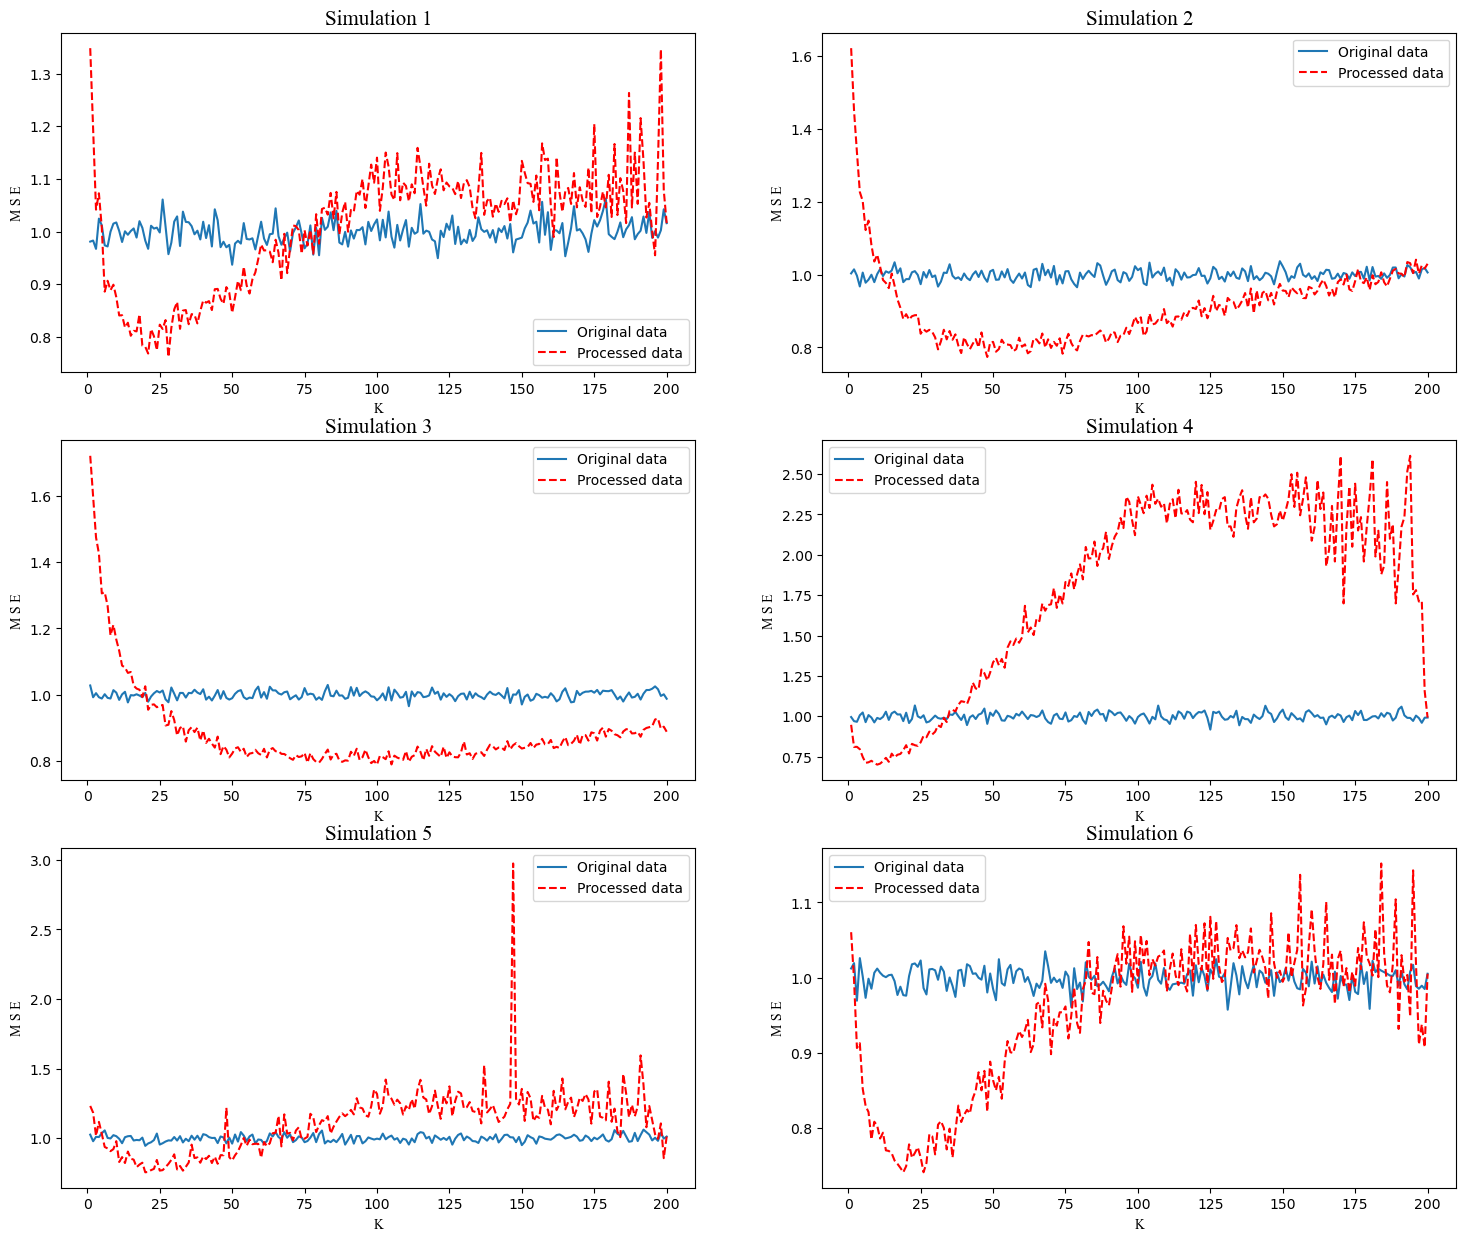

In [20]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(18,15))
dyk(data1,0,0)
dyk(data2,0,1)
dyk(data3,1,0)
dyk(data4,1,1)
dyk(data5,2,0)
dyk(data6,2,1)
axes[0,0].set_title("Simulation 1",size=15,fontproperties='Times New Roman')
axes[0,1].set_title("Simulation 2",size=15,fontproperties='Times New Roman')
axes[1,0].set_title("Simulation 3",size=15,fontproperties='Times New Roman')
axes[1,1].set_title("Simulation 4",size=15,fontproperties='Times New Roman')
axes[2,0].set_title("Simulation 5",size=15,fontproperties='Times New Roman')
axes[2,1].set_title("Simulation 6",size=15,fontproperties='Times New Roman')


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


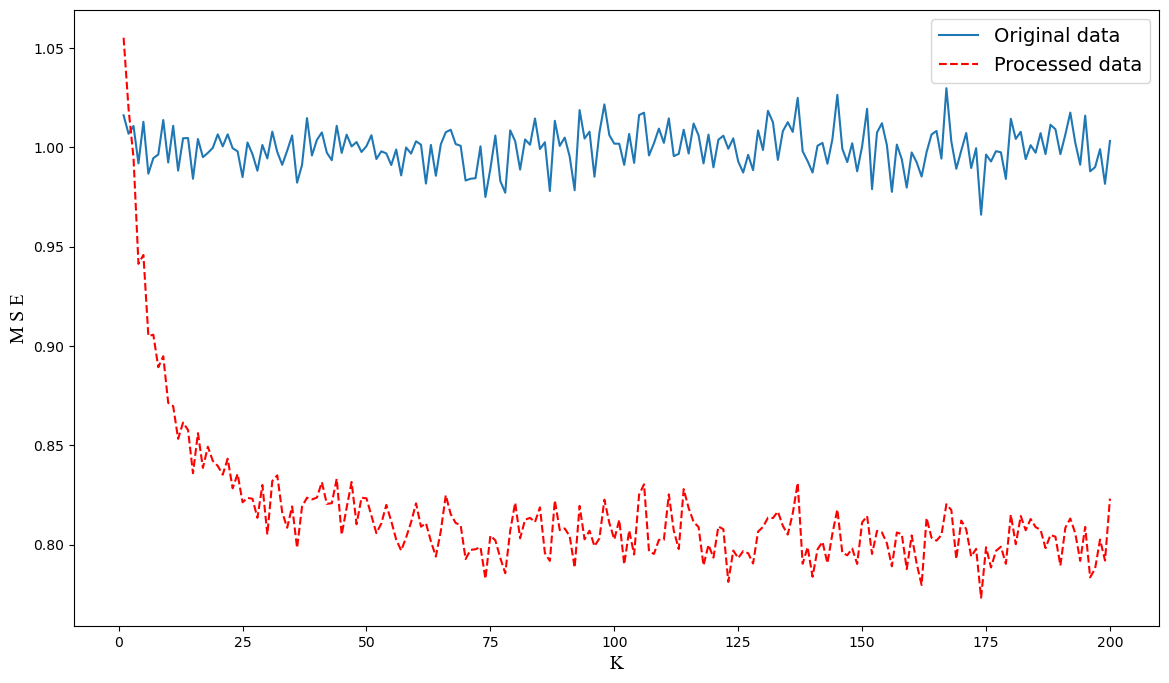

In [21]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(14,8))
list = []
for i in data7[:,-1]:
    list.append(eval(i))
axes.plot(data7[:,0],data7[:,1],label="Original data",)
axes.plot(data7[:,0],list,c="r",label="Processed data",linestyle="--")
axes.set_ylabel("M S E",fontproperties='Times New Roman',fontsize=14)
axes.set_xlabel("K",fontproperties='Times New Roman',fontsize=14)
axes.legend(fontsize=14)